In [1]:
import os
import csv
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm,metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier

from collections import defaultdict
import os
import random
import numpy as np
from tqdm import tqdm
import time
import pickle

import cv2

%matplotlib inline

In [2]:
import tensorflow
import pathlib
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, Dropout, Flatten, LSTM, Activation, MaxPooling2D
from tensorflow.keras.regularizers import l2 as L2_reg
from tensorflow.keras.layers import Conv2D, BatchNormalization, \
    MaxPool2D, GlobalMaxPool2D, Input, Masking, Conv3D, MaxPooling3D, GlobalMaxPool3D
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

from tensorflow.compat.v1.keras.backend import set_session 
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
set_session(sess)

2.12.0


In [27]:
os.getcwd()

'c:\\Users\\F\\Documents\\1 UM\\Semester 2\\group12\\fer'

In [26]:
DATA_DIR=os.getcwd()
emotion_to_index = {'Positive':1, 'Neutral':2, 'Negative':3}

In [28]:
for s in ['Val']:
    d = os.path.join(DATA_DIR, s)

    for filename in os.listdir(d):
        outd = os.path.join(DATA_DIR, 'preprocessed', s, 'frames', str(os.path.splitext(filename)[0]))

        if not os.path.exists(outd):
            os.makedirs(outd)

        command = 'ffmpeg -i "' + os.path.join(d, filename) + '" -r 1 "' + outd + '/%04d.png"'
        print(command)
        os.system(command)


ffmpeg -i "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\Val\2023-05-10 16-46-42.mkv" -r 1 "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed\Val\frames\2023-05-10 16-46-42/%04d.png"
ffmpeg -i "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\Val\2023-05-10 17-00-18.mkv" -r 1 "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed\Val\frames\2023-05-10 17-00-18/%04d.png"
ffmpeg -i "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\Val\2023-05-10 17-10-13.mkv" -r 1 "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed\Val\frames\2023-05-10 17-10-13/%04d.png"
ffmpeg -i "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\Val\video1.mkv" -r 1 "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed\Val\frames\video1/%04d.png"
ffmpeg -i "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\Val\video2.mkv" -r 1 "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed\Val\frames\video2/%04d.png"
ffmpeg -i "c:\Users\F\Documents\1 UM\Semester 2\group12\fer\Va

In [29]:
import sys
sys.path.append('C:/Users/F/Documents/1 UM/Semester 2/group12/fer/face-emotion-recognition/src')

from facial_analysis import FacialImageProcessing

In [30]:
imgProcessing=FacialImageProcessing(False,minsize=64) #32) #

In [31]:
def save_faces(source_path, save_path):
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    for folder in tqdm(os.listdir(source_path)):
        if not os.path.exists(os.path.join(save_path, folder)):
            os.mkdir(os.path.join(save_path, folder))

            for image in os.listdir(os.path.join(source_path, folder)):
                filename = os.path.join(source_path, folder, image)
                print(filename)
                frame_bgr = cv2.imread(filename)
                frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
                bounding_boxes, _ = imgProcessing.detect_faces(frame)

                if len(bounding_boxes) != 0:
                    # Sort bounding boxes by x-coordinate (left to right) this way the face on the left gets to be 0.png and the face on the right gets to be 1.png
                    bounding_boxes = sorted(bounding_boxes, key=lambda b: b[0])

                    root, ext = os.path.splitext(image)
                    faces_folder = os.path.join(save_path, folder, root) 
                    if not os.path.exists(faces_folder):
                        os.mkdir(faces_folder)
                    for i, bounding_box in enumerate(bounding_boxes):
                        outfile = os.path.join(faces_folder, str(i) + ext)
                        if not os.path.exists(outfile):
                            b = [max(0, int(bi)) for bi in bounding_box]
                            x1, y1, x2, y2 = b[0:4]
                            face_img = frame_bgr[y1:y2, x1:x2, :]

                            if np.prod(face_img.shape) == 0:
                                print('Empty face ', b, ' found for ', filename)
                                continue
                            cv2.imwrite(outfile, face_img) 
        else:
            print(folder)

save_faces(os.path.join(DATA_DIR, 'preprocessed/Val/frames'), os.path.join(DATA_DIR, 'preprocessed/Val/mtcnn'))
# save_faces(os.path.join(DATA_DIR, 'preprocessed/Train/frames'), os.path.join(DATA_DIR, 'preprocessed/Train/mtcnn'))

  0%|          | 0/7 [00:00<?, ?it/s]

c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0001.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0002.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0003.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0004.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0005.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0006.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0007.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0008.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 16-46-42\0009.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-1

 14%|█▍        | 1/7 [09:19<55:55, 559.20s/it]

c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0001.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0002.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0003.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0004.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0005.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0006.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0007.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0008.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-00-18\0009.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-1

 29%|██▊       | 2/7 [15:47<38:13, 458.70s/it]

c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0001.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0002.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0003.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0004.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0005.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0006.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0007.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0008.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-10 17-10-13\0009.png
c:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed/Val/frames\2023-05-1

100%|██████████| 7/7 [19:02<00:00, 163.26s/it]

video1
video2
video3
video4


In [32]:
import numpy as np
import cv2
import math
from skimage import transform as trans

def preprocess(img, bbox=None, landmark=None, **kwargs):
    M = None
    image_size = [224,224]
    src = np.array([
      [30.2946, 51.6963],
      [65.5318, 51.5014],
      [48.0252, 71.7366],
      [33.5493, 92.3655],
      [62.7299, 92.2041] ], dtype=np.float32 )
    if image_size[1]==224:
        src[:,0] += 8.0
    src*=2
    if landmark is not None:
        dst = landmark.astype(np.float32)

        tform = trans.SimilarityTransform()
        #dst=dst[:3]
        #src=src[:3]
        #print(dst.shape,src.shape,dst,src)
        tform.estimate(dst, src)
        M = tform.params[0:2,:]
        #M = cv2.estimateRigidTransform( dst.reshape(1,5,2), src.reshape(1,5,2), False)
        #print(M)

    if M is None:
        if bbox is None: #use center crop
            det = np.zeros(4, dtype=np.int32)
            det[0] = int(img.shape[1]*0.0625)
            det[1] = int(img.shape[0]*0.0625)
            det[2] = img.shape[1] - det[0]
            det[3] = img.shape[0] - det[1]
        else:
              det = bbox
        margin = kwargs.get('margin', 44)
        bb = np.zeros(4, dtype=np.int32)
        bb[0] = np.maximum(det[0]-margin//2, 0)
        bb[1] = np.maximum(det[1]-margin//2, 0)
        bb[2] = np.minimum(det[2]+margin//2, img.shape[1])
        bb[3] = np.minimum(det[3]+margin//2, img.shape[0])
        ret = img[bb[1]:bb[3],bb[0]:bb[2],:]
        if len(image_size)>0:
              ret = cv2.resize(ret, (image_size[1], image_size[0]))
        return ret 
    else: #do align using landmark
        assert len(image_size)==2
        warped = cv2.warpAffine(img,M,(image_size[1],image_size[0]), borderValue = 0.0)
        return warped

C:\Users\F\AppData\Local\Temp\ipykernel_13716\169465507.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  box = bbox.astype(np.int)


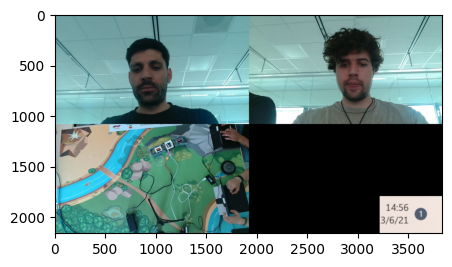

<Figure size 500x500 with 0 Axes>

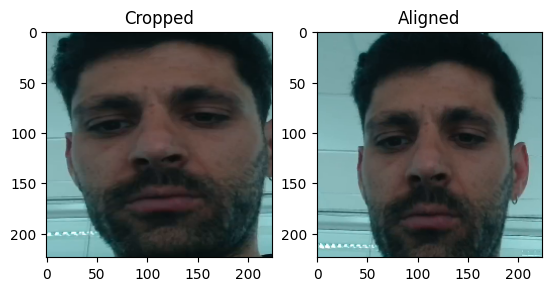

<Figure size 500x500 with 0 Axes>

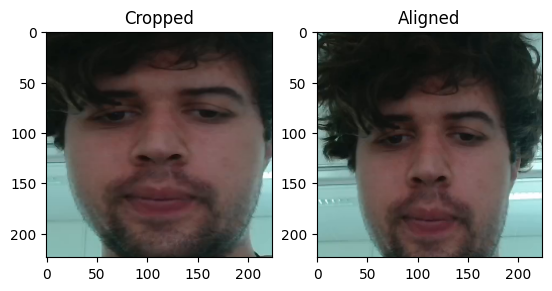

In [25]:
import matplotlib.pyplot as plt
fpath=r'C:\Users\F\Documents\1 UM\Semester 2\group12\fer\preprocessed\Val\frames\video1\0111.png'
#fpath='/home/HDD6TB/datasets/emotions/EmotiW/VGAF/preprocessed/Val/frames/5_2/0001.png'
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
#frame=cv2.resize(frame, (0,0), fx=1, fy=1) 
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    #face_img=frame[y1:y2,x1:x2,:]

    #face_img=extract_image_chip(frame,p)
    p = p.reshape((2,5)).T
        
    plt.figure(figsize=(5, 5))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    face_img=preprocess(frame,box,None) #p)
    ax1.set_title('Cropped')
    ax1.imshow(face_img)
    
    face_img=preprocess(frame,box,p)
    ax2.set_title('Aligned')
    ax2.imshow(face_img)

In [33]:
def save_aligned_faces(source_path, save_path):
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    for folder in tqdm(os.listdir(source_path)):
        if not os.path.exists(os.path.join(save_path, folder)):
            os.mkdir(os.path.join(save_path, folder))

            for image in os.listdir(os.path.join(source_path, folder)):
                filename = os.path.join(source_path, folder, image)
                frame_bgr = cv2.imread(filename)
                frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
                bounding_boxes, points = imgProcessing.detect_faces(frame)
                points = points.T

                if len(bounding_boxes) != 0:
                    # Sort bounding boxes and corresponding points by x-coordinate (left to right)
                    bounding_boxes, points = zip(*sorted(zip(bounding_boxes, points), key=lambda pair: pair[0][0]))

                    root, ext = os.path.splitext(image)
                    faces_folder = os.path.join(save_path, folder, root) 
                    if not os.path.exists(faces_folder):
                        os.mkdir(faces_folder)
                    for i, b in enumerate(bounding_boxes):
                        outfile = os.path.join(faces_folder, str(i) + ext)
                        if not os.path.exists(outfile):
                            p = points[i]
                            if True: #not USE_RETINA_FACE:
                                p = p.reshape((2,5)).T
                            face_img = preprocess(frame_bgr, b, p)

                            if np.prod(face_img.shape) == 0:
                                print('Empty face ', b, ' found for ', filename)
                                continue
                            cv2.imwrite(outfile, face_img) 
        else:
            print(folder)

save_aligned_faces(os.path.join(DATA_DIR, 'preprocessed/Val/frames'), os.path.join(DATA_DIR, 'preprocessed/Val/mtcnn_aligned'))


100%|██████████| 7/7 [18:36<00:00, 159.46s/it]

video1
video2
video3
video4
